In [1]:
import pandas as pd
import numpy as np
import sqlutils as db
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro, probplot

path_to_data = "data/Soil Nutrients.csv"


# Extract

In [2]:
df = pd.read_csv(path_to_data)


# Transform

In [3]:
df.rename(str.lower, axis='columns', inplace=True)

df.columns = df.columns.str.replace(' ', '_')

print(df.columns)


Index(['name', 'fertility', 'photoperiod', 'temperature', 'rainfall', 'ph',
       'light_hours', 'light_intensity', 'rh', 'nitrogen', 'phosphorus',
       'potassium', 'yield', 'category_ph', 'soil_type', 'season', 'n_ratio',
       'p_ratio', 'k_ratio'],
      dtype='object')


In [4]:

df.name = df.name.astype(str)
df.fertility = df.fertility.astype(str)
df.photoperiod = df.photoperiod.astype(str)
df.temperature = df.temperature.astype(float)
df.rainfall = df.rainfall.astype(float)
df.ph = df.ph.astype(float)
df.light_hours = df.light_hours.astype(float)
df.light_intensity = df.light_intensity.astype(float)
df.rh = df.rh.astype(float)
df.nitrogen = df.nitrogen.astype(float)
df.phosphorus = df.phosphorus.astype(float)
df.potassium = df.potassium.astype(float)
df["yield"] = df["yield"].astype(float)
df.category_ph = df.category_ph.astype(str)
df.soil_type = df.soil_type.astype(str)
df.season = df.season.astype(str)
df.n_ratio = df.n_ratio.astype(float)
df.p_ratio = df.p_ratio.astype(float)
df.k_ratio = df.k_ratio.astype(float)

print(df.columns)

print(df.value_counts().isna().sum())

Index(['name', 'fertility', 'photoperiod', 'temperature', 'rainfall', 'ph',
       'light_hours', 'light_intensity', 'rh', 'nitrogen', 'phosphorus',
       'potassium', 'yield', 'category_ph', 'soil_type', 'season', 'n_ratio',
       'p_ratio', 'k_ratio'],
      dtype='object')
0


# Load

In [5]:
conn = db.create_tables()

db.insert_data(df)

# Business Question 1:

## What crops are available to us?

In [6]:
query = """
        SELECT DISTINCT name 
        FROM soil_data
        """

print(db.query_db(query))

              name
0       Strawberry
1       Watermelon
2           Grapes
3          Arugula
4             Beet
5            Chard
6            Cress
7           Endive
8             Kale
9          Lettuce
10       Radicchio
11         Spinach
12        Tomatoes
13       Eggplants
14       Asparagus
15  Chilli Peppers
16         Cabbage
17       Cucumbers
18        Potatoes
19    Cauliflowers
20        Broccoli
21      Green Peas


# Business Question 2

## Which crops require high Fertility fields?

In [7]:
query = """
        SELECT DISTINCT name 
        FROM soil_data 
        WHERE fertility = 'High'
        """

print(db.query_db(query))

            name
0     Watermelon
1           Beet
2          Chard
3          Cress
4         Endive
5           Kale
6        Spinach
7       Tomatoes
8      Eggplants
9      Asparagus
10       Cabbage
11     Cucumbers
12  Cauliflowers
13      Broccoli


# Business Question 3

## Given that we are starting this farm in Spring, do we have data on these crops for this season?

In [8]:
query = """
        SELECT DISTINCT name 
        FROM soil_data 
        WHERE fertility = 'High' AND season = 'Spring'
        """

candidates = db.query_db(query)
print(candidates)


          name
0   Watermelon
1         Beet
2        Chard
3        Cress
4       Endive
5         Kale
6      Spinach
7     Tomatoes
8    Eggplants
9    Asparagus
10     Cabbage
11   Cucumbers
12    Broccoli


In [9]:

crop_list = "'" + "', '".join(candidates['name'].tolist()) + "'"

print(crop_list)

'Watermelon', 'Beet', 'Chard', 'Cress', 'Endive', 'Kale', 'Spinach', 'Tomatoes', 'Eggplants', 'Asparagus', 'Cabbage', 'Cucumbers', 'Broccoli'


In [10]:

query = f"""
        SELECT DISTINCT name
        FROM soil_data
        WHERE name IN ({crop_list})
        """

print(db.query_db(query))

          name
0   Watermelon
1         Beet
2        Chard
3        Cress
4       Endive
5         Kale
6      Spinach
7     Tomatoes
8    Eggplants
9    Asparagus
10     Cabbage
11   Cucumbers
12    Broccoli


# Business Question 4
 
## What are the seed and sale prices per kg of these crops?

In [11]:
query = f"""
        SELECT DISTINCT p.name, p.seed_price, p.sale_price
        FROM crops_pricing as p
        JOIN soil_data as s
        ON p.name = s.name
        WHERE s.name IN ({crop_list})
        ORDER BY sale_price DESC
        """

print(db.query_db(query))

          name  seed_price  sale_price
0        Cress        0.01        12.0
1    Asparagus        0.10         5.0
2         Beet        0.05         4.0
3      Spinach        0.02         4.0
4         Kale        0.03         3.5
5        Chard        0.03         3.0
6       Endive        0.02         3.0
7     Tomatoes        0.05         2.5
8     Broccoli        0.03         2.2
9    Eggplants        0.05         2.0
10   Cucumbers        0.04         1.5
11  Watermelon        0.15         1.2
12     Cabbage        0.02         1.0


### FUN FACT: Garden cress ( Mastuerzo in spanish ) is genetically related to watercress and mustard, sharing their peppery, tangy flavour and aroma. When consumed raw, cress is a high-nutrient food containing substantial content of vitamins A, C and K and several dietary minerals.

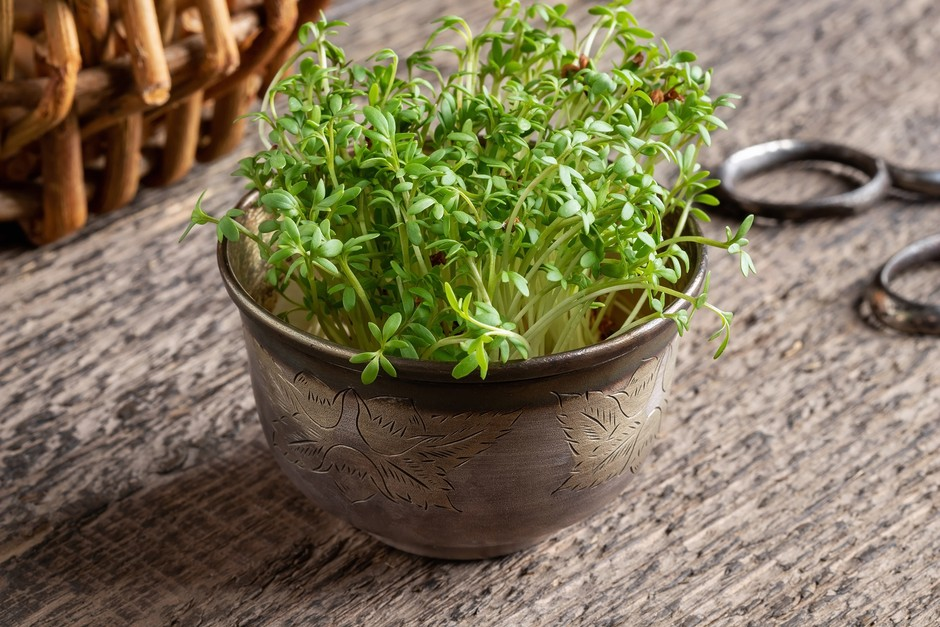

# Business Question 5:

## From the top 3 crops, which tends to have a higher yield?

<Axes: xlabel='yield', ylabel='Count'>

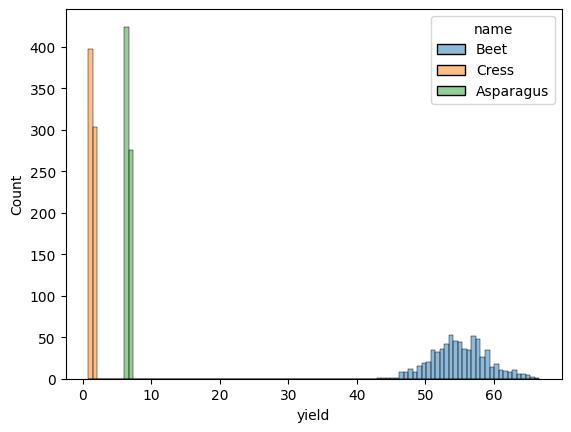

In [12]:
query = f"""
        SELECT DISTINCT name, yield
        FROM soil_data
        WHERE name IN ('Cress', 'Asparagus', 'Beet')
        """

df_top3 = db.query_db(query)

sns.histplot(df_top3, x='yield', hue='name', bins=100)

In [13]:
df_top3.groupby('name').describe()

yield                                                        \
           count       mean       std        min        25%        50%   
name                                                                     
Asparagus  700.0   6.639084  0.176016   6.069992   6.518728   6.649114   
Beet       700.0  55.089135  4.009929  43.406505  52.408939  54.917136   
Cress      700.0   1.395554  0.201656   0.770213   1.251322   1.399096   

                                 
                 75%        max  
name                             
Asparagus   6.759227   7.166644  
Beet       57.701502  66.619242  
Cress       1.521636   2.017659

### Even if the sale price of Cress is 3x the price of Beets, Beets yield, on average, 50x more!!!

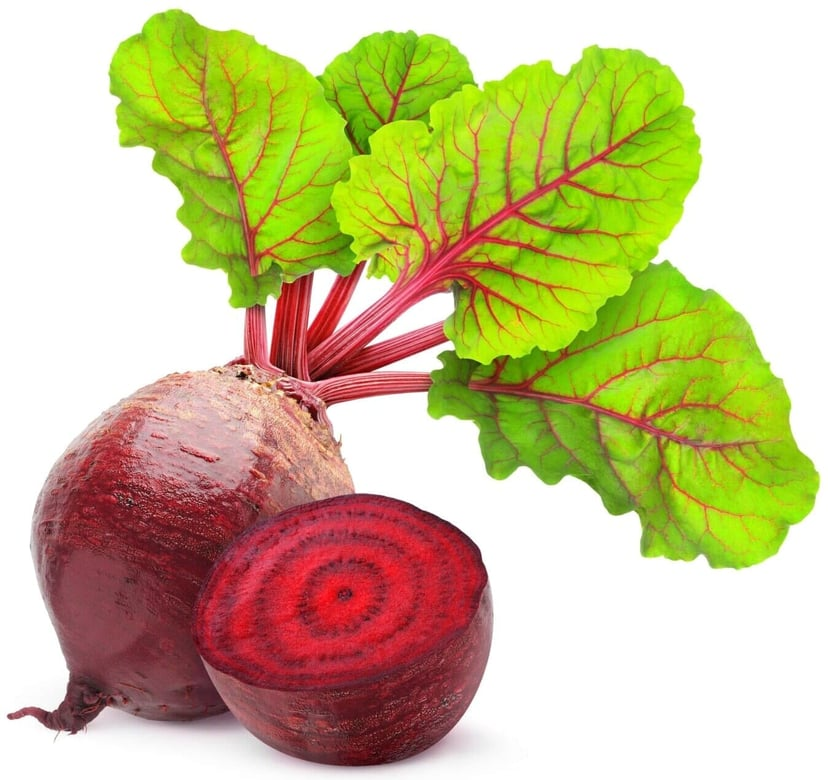

# Business Question 6

## How is the distribution of Beet yields?

<Axes: xlabel='yield', ylabel='Count'>

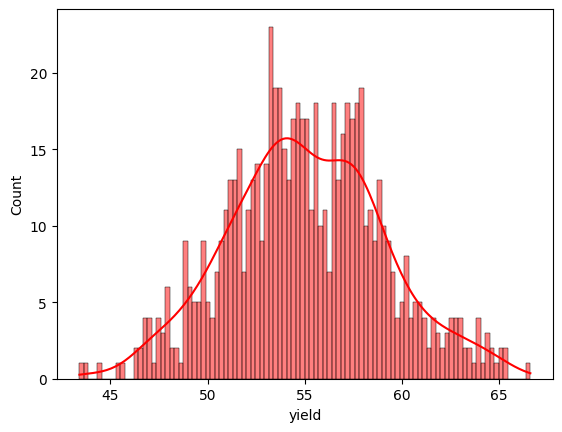

In [14]:
query = f"""
        SELECT yield
        FROM soil_data
        WHERE name = 'Beet'
        """

beet_df = db.query_db(query)


sns.histplot(beet_df, x='yield', bins=100, kde=True, color='red')

In [15]:
print("beet yield Kurtosis: ", kurtosis(beet_df['yield']))
print("beet yield Skewness: ", skew(beet_df['yield']))


beet yield Kurtosis:  -0.09711324196816973
beet yield Skewness:  0.0858706346002155


### Very Slightly Positively Skewed - The right side (tail) of the distribution is longer

### Very Slight Negative Kutosis - Most values concentrated around the mean, with fewer extremes or outliers

# Business Question 7

## Statistical tests to confirm if the beet yield resembles a normal distribution

In [16]:

statistic, p_value = shapiro(beet_df['yield'])

print(f"Shapiro Test Statistic: {statistic}")
print(f"P-value: {p_value}")


Shapiro Test Statistic: 0.9972438912662779
P-value: 0.28853094742397


### P Value much superior to 0.05! We confirm that the data is very normally distributed

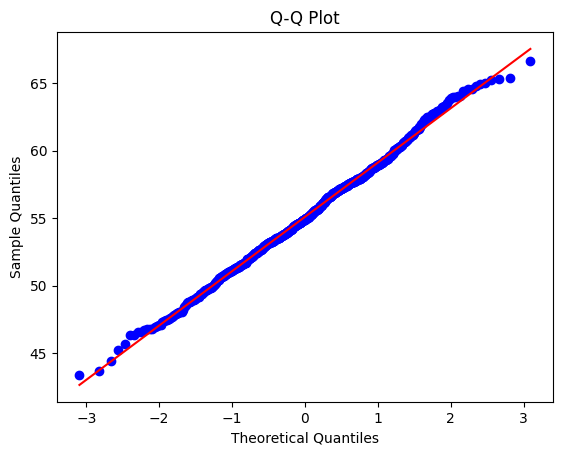

In [17]:
probplot(beet_df['yield'], dist="norm", plot=plt)

# Improve plot aesthetics
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

# Business Question 8

## Which factors influence the yield the most? (Correlation Analysis)

In [18]:
query = f"""
        SELECT *
        FROM soil_data
        WHERE name = 'Beet'
        """

beet_df = db.query_db(query)

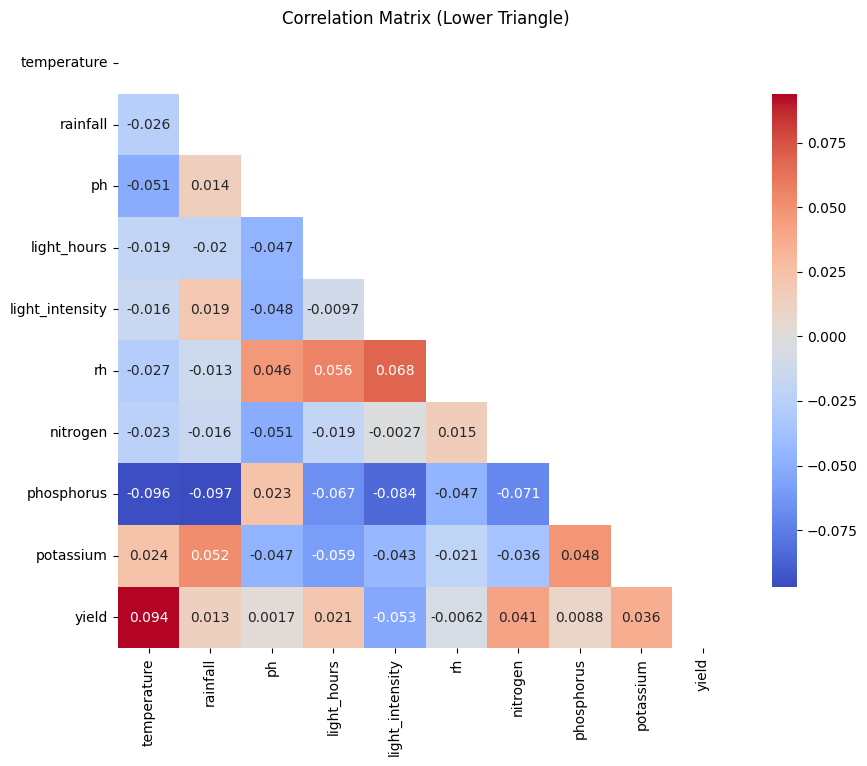

In [19]:
# We need to remove non numeric columns for the correlation matrix

beet_df = beet_df.select_dtypes(include=[np.number])
beet_df.drop('n_ratio', axis=1, inplace=True)
beet_df.drop('p_ratio', axis=1, inplace=True)
beet_df.drop('k_ratio', axis=1, inplace=True)

corr = beet_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adjust the title and display
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

### For the Best yields, we should focus on higher temperatures, nitrogen levels and potassium, but also lower light intensity levels!

# Business Question 9:

## Can we trust our data? Do we have a lot of bias our samples?

In [20]:
beet_df.drop('yield', axis=1, inplace=True)


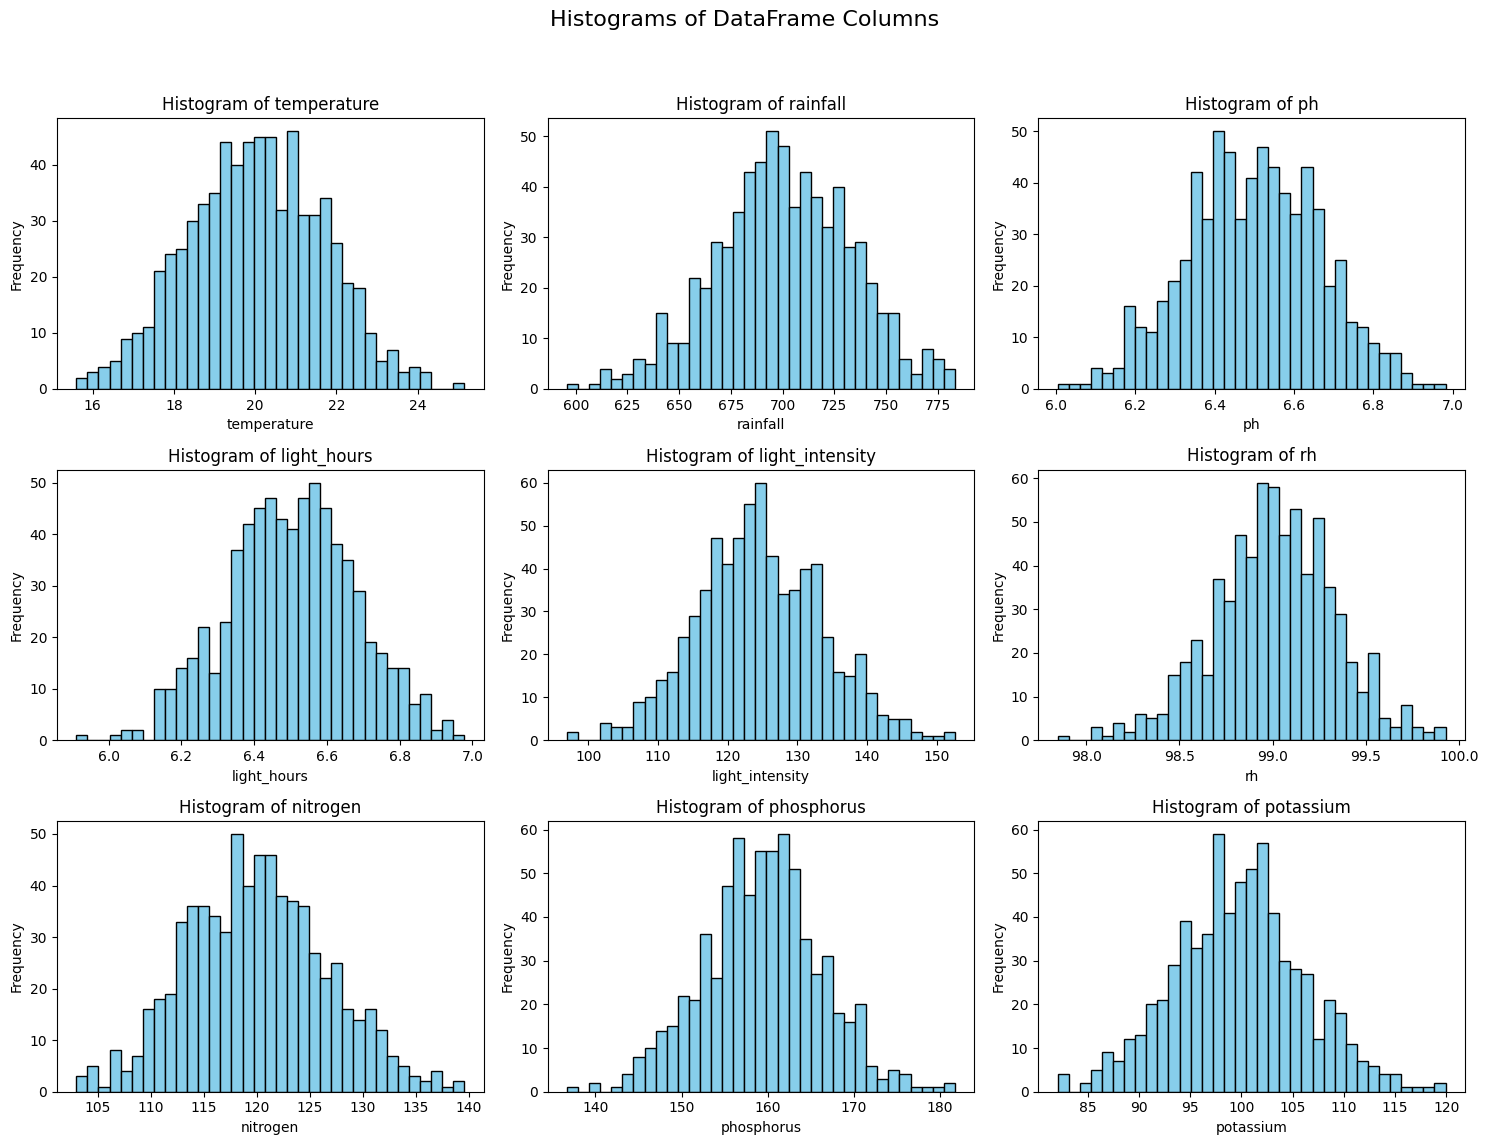

In [21]:

num_cols = len(beet_df.columns)
num_rows = 3
num_per_row = (num_cols + num_rows - 1) // num_rows  # This gets the ceiling of division

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, num_per_row, figsize=(5 * num_per_row, 4 * num_rows))
fig.suptitle('Histograms of DataFrame Columns', fontsize=16)

# Iterate over each column and plot a histogram
for i, col in enumerate(beet_df.columns):
    row = i // num_per_row
    col_index = i % num_per_row
    axes[row][col_index].hist(beet_df[col], bins=35, color='skyblue', edgecolor='black')
    axes[row][col_index].set_title(f'Histogram of {col}')
    axes[row][col_index].set_xlabel(col)
    axes[row][col_index].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, num_rows * num_per_row):
    row = j // num_per_row
    col_index = j % num_per_row
    fig.delaxes(axes[row][col_index])

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Business Question 10:

## What were the conditions for the best beet havest?

In [24]:
query = """
    SELECT temperature, rainfall, ph, light_hours, light_intensity, rh, nitrogen, phosphorus, potassium, yield
    FROM soil_data
    WHERE name = 'Beet'
    ORDER BY yield DESC
    LIMIT 5
    """

top_5_beet_yields = db.query_db(query)
print(top_5_beet_yields)

   temperature    rainfall        ph  light_hours  light_intensity         rh  \
0    17.747869  639.490364  6.561778     6.620509       107.133870  98.731592   
1    20.571534  714.127535  6.854662     6.507424       140.249854  99.517890   
2    19.278827  659.731465  6.869239     6.812259       117.774482  98.742227   
3    20.322244  646.786375  6.401601     6.679676       130.187629  98.718038   
4    15.880076  721.725046  6.459939     6.431816       118.797867  98.153931   

     nitrogen  phosphorus   potassium      yield  
0  117.126339  178.565023  108.451130  66.619242  
1  136.817999  162.496337   97.880576  65.380183  
2  124.408620  162.676817   99.416687  65.309815  
3  119.558110  161.589826   93.075418  65.204458  
4  117.920533  159.138257  103.875029  65.023367  


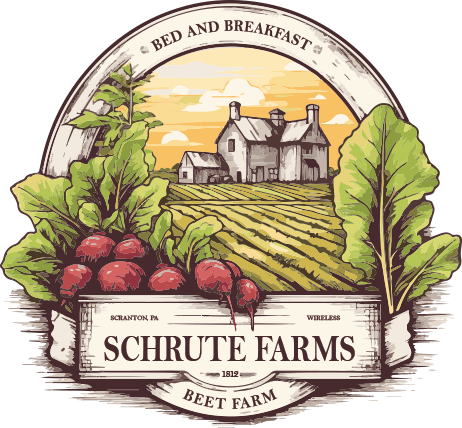